In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline

In [2]:
# standard imports
import numpy as np
import numpy.ma as ma
import xarray as xr

### maps
import cmocean 

sst_cmap = cmocean.cm.thermal
ssh_cmap = cmocean.cm.haline

import seaborn as sns
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

## inputfile
inputfile='NATL60OSMO-CJM165_y2012m06d14-y2013m10d01.1d_SST-SSH.nc'

/Users/redouanelg/anaconda3/envs/geoscience/lib/python2.7/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


In [3]:
natl60=xr.open_dataset(inputfile)

In [4]:
natl60


<xarray.Dataset>
Dimensions:              (axis_nbounds: 2, time_counter: 475, x: 529, y: 906)
Coordinates:
    nav_lat              (y, x) float32 ...
    nav_lon              (y, x) float32 ...
    time_centered        (time_counter) datetime64[ns] ...
  * time_counter         (time_counter) datetime64[ns] 2012-06-14T12:00:00 ...
Dimensions without coordinates: axis_nbounds, x, y
Data variables:
    sossheig             (time_counter, y, x) float64 ...
    sosstsst             (time_counter, y, x) float64 ...
    time_counter_bounds  (time_counter, axis_nbounds) float64 ...
Attributes:
    description:               ocean T grid variables
    title:                     ocean T grid variables
    Conventions:               CF-1.5
    production:                An IPSL model
    start_date:                20120301
    output_frequency:          1d
    CONFIG:                    NATL60
    CASE:                      CJM165
    history:                   Wed Dec 14 16:21:51 2016: ncrcat 

In [5]:
natl60.sossheig


<xarray.DataArray 'sossheig' (time_counter: 475, y: 906, x: 529)>
[227655150 values with dtype=float64]
Coordinates:
    nav_lat        (y, x) float32 ...
    nav_lon        (y, x) float32 ...
    time_centered  (time_counter) datetime64[ns] ...
  * time_counter   (time_counter) datetime64[ns] 2012-06-14T12:00:00 ...
Dimensions without coordinates: y, x
Attributes:
    standard_name:       sea_surface_height_above_geoid
    long_name:           sea surface height
    units:               m
    online_operation:    average
    interval_operation:  100 s
    interval_write:      1 d
    cell_methods:        time: mean (interval: 100 s)

In [6]:
natl60.sossheig.shape

(475, 906, 529)

In [7]:
## plot
def data_plot(lons,lats,data,cmap=None,vmin=None,vmax=None):
    plt.figure(figsize=(15,10))
    proj = ccrs.PlateCarree()
    ax = plt.axes(projection=proj)
    cs = plt.pcolormesh(lons, lats, data,transform=proj,cmap=cmap,vmin=vmin,vmax=vmax)
    ax.coastlines(resolution="10m")
    ax.gridlines(draw_labels=True)
    cb = plt.colorbar(cs, extend='both', fraction=0.042, pad=0.04, orientation="vertical")

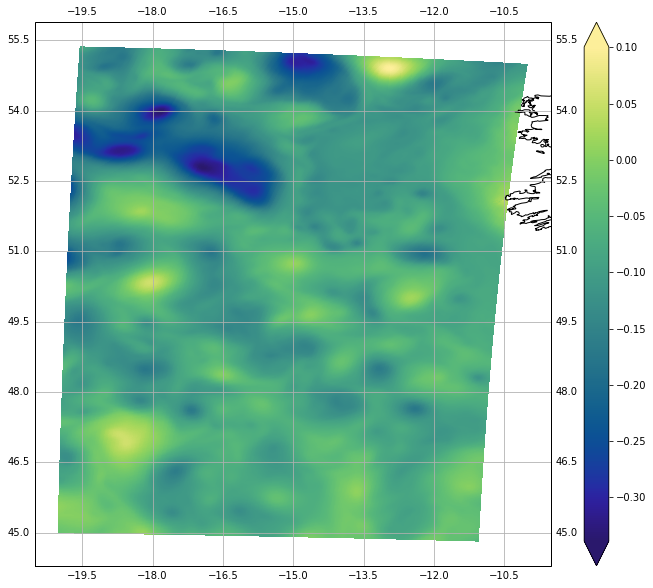

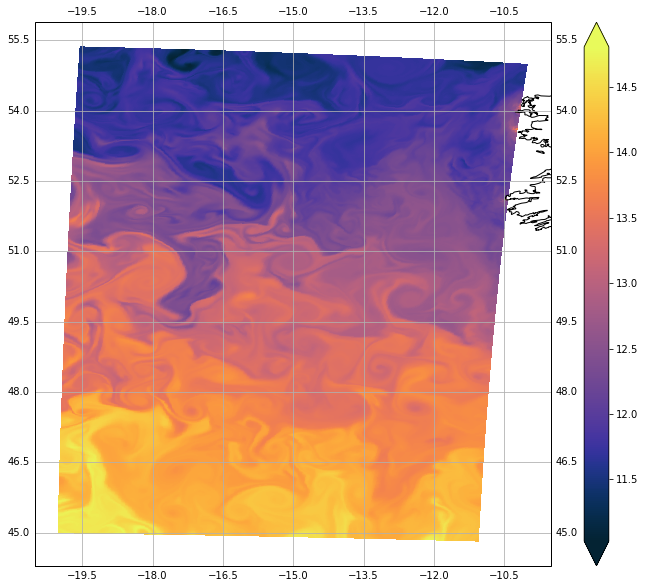

In [8]:
lons = natl60.nav_lon
lats = natl60.nav_lat
data_plot(lons,lats,natl60.sossheig[0,:,:],cmap=ssh_cmap)
data_plot(lons,lats,natl60.sosstsst[0,:,:],cmap=sst_cmap)